<a href="https://colab.research.google.com/github/andre-coimbra-ifg/CTG_RP_PC/blob/master/CTG_RP_Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Config Colab Instance

Install packages and download libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download config file from GitHub Repo

Include any default source files

In [ ]:
! rm config_local.py
! wget https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/config_local.py

rm: cannot remove 'config_local.py': No such file or directory
--2024-08-08 23:29:33--  https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/config_local.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1358 (1.3K) [text/plain]
Saving to: ‘config_local.py’

config_local.py     100%[===================>]   1.33K  --.-KB/s    in 0s      

2024-08-08 23:29:33 (77.4 MB/s) - ‘config_local.py’ saved [1358/1358]



In [ ]:
from config_local import get_default_github_src_files

### Download other specified files from src folder

In [ ]:
get_default_github_src_files()

Beginning file download of file basic_denoise.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/basic_denoise.py
Beginning file download of file compute_metadata.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/compute_metadata.py
Beginning file download of file ctg_utils.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/ctg_utils.py
Beginning file download of file generate_recurrence_images.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/generate_recurrence_images.py
Beginning file download of file generate_poincare_images.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/generate_poincare_images.py
Beginning file download of file libPC.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/libPC.py
Beginning file download of file libRP.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/libRP.py
Beginning fil

In [ ]:
! ls

basic_denoise.py     ctg_utils.py		    libPC.py	 sample_data
compute_metadata.py  generate_poincare_images.py    libRP.py	 simple_test.py
config_local.py      generate_recurrence_images.py  __pycache__


In [ ]:
# test code
import simple_test as test
test.test()

Hi There


## Install Packages Dependencies

In [ ]:
! pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
! pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.7 MB/s eta 0:00:00


## Download CTU-UHB Database

In [ ]:
!pwd
!ls

/content
basic_denoise.py     ctg_utils.py		    libPC.py	 sample_data
compute_metadata.py  generate_poincare_images.py    libRP.py	 simple_test.py
config_local.py      generate_recurrence_images.py  __pycache__


In [ ]:
#!rsync -Cavz physionet.org::ctu-uhb-ctgdb  /content/ctu-uhb-ctgdb
# !wget -r -N -c -np -nv -P /content/ctu-uhb-ctgdb https://physionet.org/files/ctu-uhb-ctgdb/1.0.0/
!gdown 1h_qlULLpSR9fAJvzeE1Zkq2C2aIuB-N9
!unzip "/content/ctu-uhb-ctgdb.zip" -d "/content/"

In [ ]:
# !mv /content/ctu-uhb-ctgdb/physionet.org/files/ctu-uhb-ctgdb/1.0.0/* /content/ctu-uhb-ctgdb
# !rm -r /content/ctu-uhb-ctgdb/physionet.org

In [ ]:
# !ls /content/ctu-uhb-ctgdb/

# Generate Recurrence Plots and Datasets

In [ ]:
! rm -R images

rm: cannot remove 'images': No such file or directory


## Import libraries

In [ ]:
import config_local
from config_local import *

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gc #garbage collector

from fastai.vision.all import *

import torch
from torch import nn

# import collections
# import pprint
import random

In [ ]:
from compute_metadata import generate_list, save_label_file
from generate_recurrence_images import generate_rp_images_segment, gen_recurrence_params

## Config
Configure Recurrence Plot Parameters

In [ ]:
np.random.seed(1234)
random.seed(1234)

POLICY='late_valid' # 'best_quality', 'early_valid', 'late_valid'

rp_params = gen_recurrence_params(dimensions=[2], time_delays=[1], percentages=[1, 3, 10], use_clip_vals=[False])
rp_params

[{'dimension': 2, 'time_delay': 1, 'percentage': 1, 'use_clip': False},
 {'dimension': 2, 'time_delay': 1, 'percentage': 3, 'use_clip': False},
 {'dimension': 2, 'time_delay': 1, 'percentage': 10, 'use_clip': False}]

In [ ]:
tfms=[]
size=224
bs=64
workers=4

## Generate Recurrence Plots

Making sure images are generated correctly


Record: 1001  Samples: 19200   Duration: 80.0 min   Stage.II: 20 min


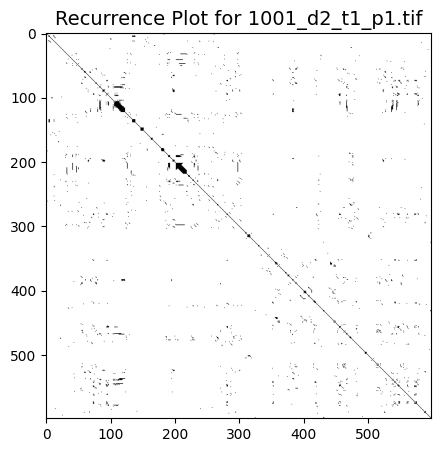

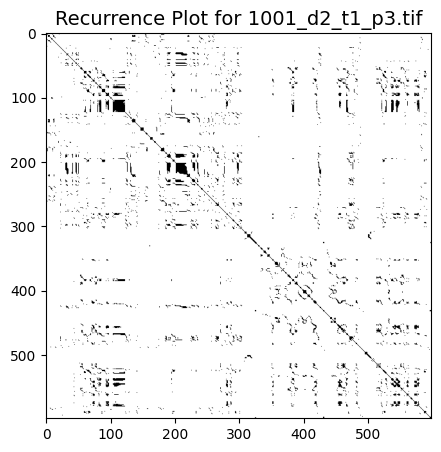

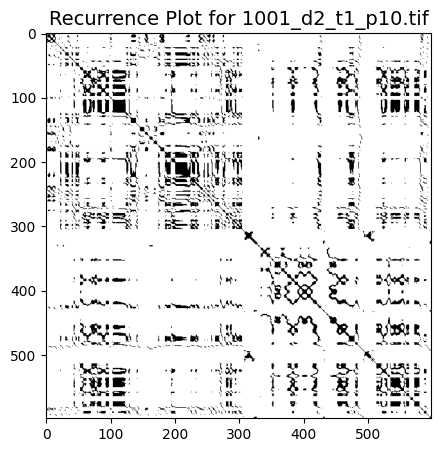


Record: 1002  Samples: 19200   Duration: 80.0 min   Stage.II: 20 min


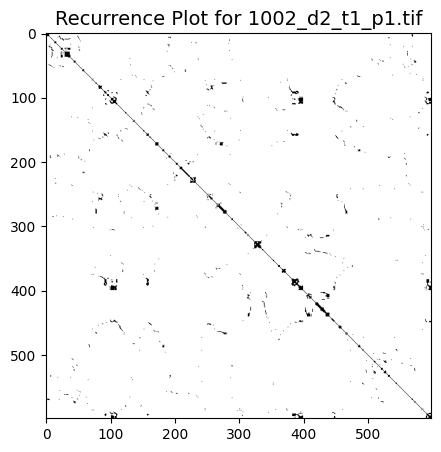

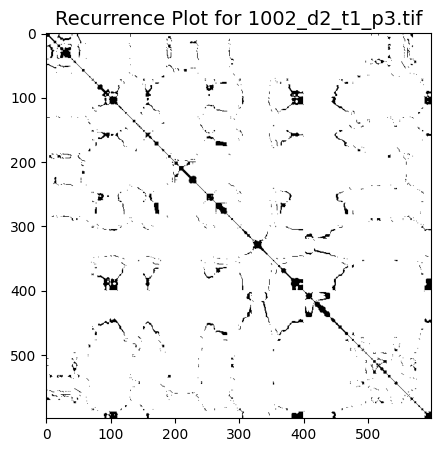

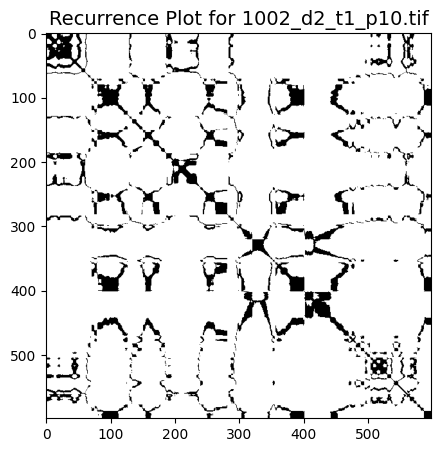

(2, 6)

In [ ]:
generate_rp_images_segment(RECORDINGS_DIR, images_dir=IMAGES_DIR, rp_params=rp_params,
                           policy=POLICY, show_signal=False, show_image=True, verbose=True, cmap='binary',
                           limit=2, max_seg_min=10, n_dec=4)

Generating the images from all samples

In [ ]:
generate_rp_images_segment(RECORDINGS_DIR, images_dir=IMAGES_DIR, rp_params=rp_params,
                           policy=POLICY, show_signal=False, show_image=False, verbose=False,
                           cmap='binary', max_seg_min=10, n_dec=4)

(552, 1656)

## Generate Train and Valid Label Files

In [ ]:
# train_valid_groups_full = get_splits(image_dir=images_path, image_file='rp_images_index.json',
#                                      exclude=['_clipped'],
#                                      thresh = 7.15, n_splits=2, verbose=False)
# print(train_valid_groups_full[0])
# print(len(train_valid_groups_full[0]['train'][False]))

# TODO: alter the code to remove this step
# Create valid_x.csv files for each split
# for i in range(len(train_valid_groups_full)):
#      generate_lists(train_valid_groups_full[i], train_file='train_{}.csv'.format(i),
#                     valid_file='valid_{}.csv'.format(i))
# generate_label_file(train_valid_groups_full[0], csv_file='labels.csv')

recordings, outcomes, results = generate_list(image_dir=IMAGES_DIR, image_file='rp_images_index.json',
                                              thresh=7.15, key='pH', verbose=False)

save_label_file(results, image_dir=IMAGES_DIR, csv_file='labels.csv')


In [ ]:
!ls images/*.csv

images/labels.csv


#Convolutional Neural Network [CNN]

Set DataLoader

1 - normal (pH greater or equal 7.15)
0 - hypoxia (pH lower than 7.15)


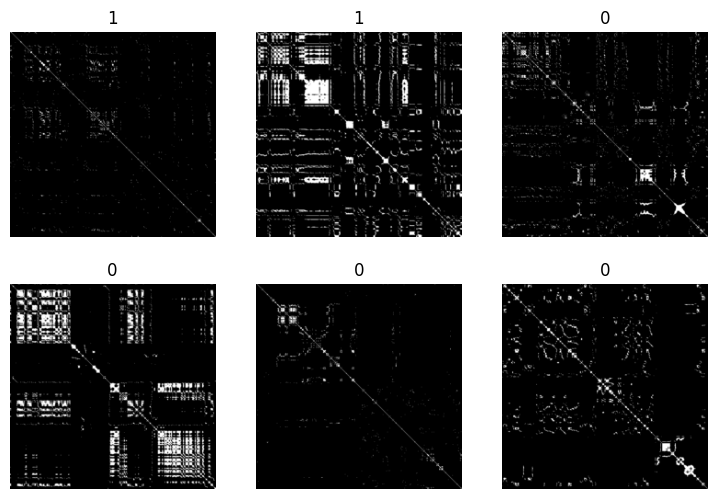

In [ ]:
dls = ImageDataLoaders.from_csv(images_path, 'labels.csv', valid_pct=0.2, seed=42, item_tfms=Resize(size))
print('1 - normal (pH greater or equal 7.15)')
print('0 - hypoxia (pH lower than 7.15)')
dls.show_batch(max_n=6)

In [ ]:
print(f'Train len = {len(dls.train.items)}')
print(f'Valid len = {len(dls.valid.items)}')
# dls.train.dataset
# dls.train.vocab
# xb, yb = dls.one_batch()
# print(f'xb.shape = {xb.shape}, yb.shape = {yb.shape}')

Train len = 504
Valid len = 126


In [ ]:
# train = ImageDataLoaders.from_csv(path, 'train_0.csv', item_tfms=Resize(size), train='train')
# valid = ImageDataLoaders.from_csv(path, 'valid_0.csv', item_tfms=Resize(size), valid='valid')

In [ ]:
# learn = vision_learner(dls, resnet50, metrics=error_rate)
# learn = vision_learner(dls, resnet34, metrics=error_rate)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)
learn.show_results(max_n=6)

epoch,train_loss,valid_loss,error_rate,time
0,1.301107,0.934913,0.460317,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.911502,0.752689,0.380952,00:06
1,0.771426,0.959094,0.388889,00:04
2,0.649096,1.122898,0.380952,00:04
3,0.534951,1.154177,0.373016,00:06


EOFError: 

In [ ]:
# x, y = dls.one_batch()
# y

In [ ]:
#learn.summary()

In [ ]:
# learn.fine_tune(2, base_lr=4e-5)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.007803,0.870359,0.257669,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.010487,1.062821,0.288344,00:08


EOFError: 

SuggestedLRs(valley=6.30957365501672e-05)

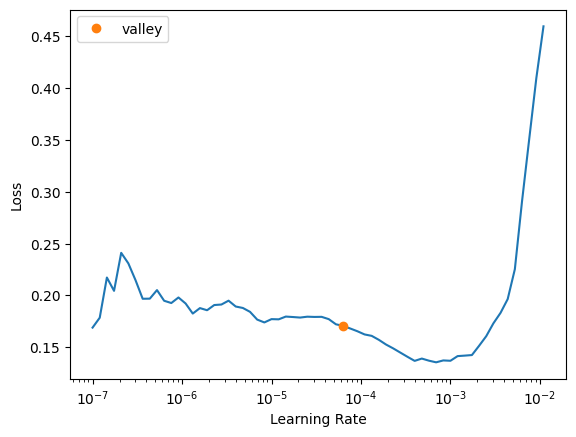

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100, 6e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.028624,1.244333,0.337423,00:07
1,0.040055,1.116743,0.288344,00:07
2,0.029141,1.094478,0.300613,00:08
3,0.021648,1.094266,0.312883,00:07
4,0.016453,1.096493,0.300613,00:07
5,0.014398,1.051827,0.276074,00:07
6,0.011579,0.987899,0.257669,00:08
7,0.009979,0.943889,0.251534,00:12
8,0.008790,0.938165,0.269939,00:08
9,0.007408,0.939426,0.257669,00:07


EOFError: 

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


SuggestedLRs(valley=1.4454397387453355e-05)

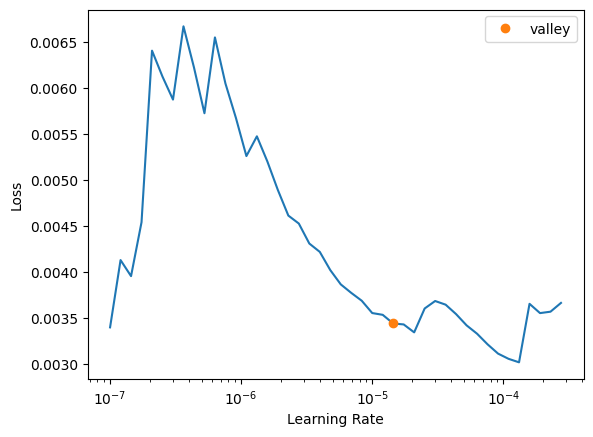

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, 1e-5)

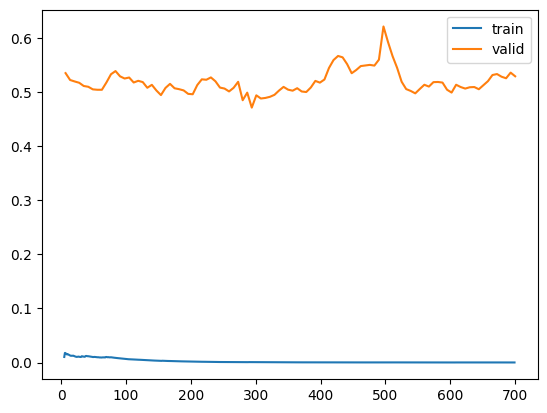

In [ ]:
learn.recorder.plot_loss()

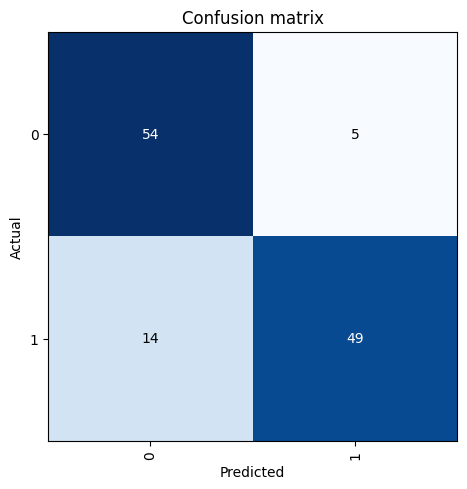

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

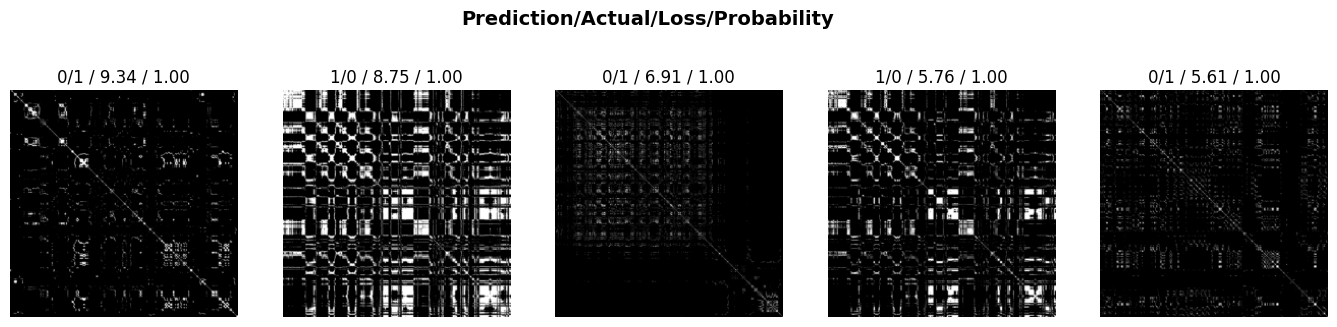

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
#learn.export('model.pkl')

In [ ]:
db.batch_stats()

AttributeError: ignored

In [ ]:
print('nClass: {}    classes: {}'.format(db.c, db.classes))
db

nClass: 2    classes: [0, 1]


ImageDataBunch;

Train: LabelList (492 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: images;

Valid: LabelList (120 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: images;

Test: None

492 torch.Size([599, 599])


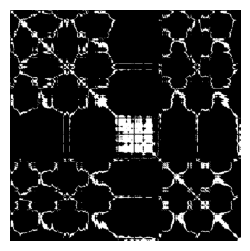

In [ ]:
im = train.get(-1)
print(len(train), im.size)
im.show()

## Define Model

In [ ]:
trial_model = nn.Sequential(
    nn.Sequential(
          nn.Conv2d(3,8,5),     # 60 × 60 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 29 × 29 × 8

          #nn.Dropout(p=0.25),
          nn.Conv2d(8,8,5),         # 25 × 25 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 12 × 12 × 8

          Flatten()         # 1152
    ),
    # removed model head to compute flatten size
)

In [ ]:
trial_learn = vision_learner(dls, trial_model, metrics=error_rate)

TypeError: ignored

In [ ]:
trial_learn = Learner(db, trial_model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
trial_learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 60, 60]          608        True      
______________________________________________________________________
ReLU                 [8, 60, 60]          0          False     
______________________________________________________________________
AvgPool2d            [8, 29, 29]          0          False     
______________________________________________________________________
Conv2d               [8, 25, 25]          1,608      True      
______________________________________________________________________
ReLU                 [8, 25, 25]          0          False     
______________________________________________________________________
AvgPool2d            [8, 12, 12]          0          False     
______________________________________________________________________
Flatten              [1152]               0          False     
___________________________________________________

In [ ]:
del trial_model
trial_learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [ ]:
mymodel = nn.Sequential(
    nn.Sequential(
          nn.Conv2d(3,8,5),     # 60 × 60 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 29 × 29 × 8

          #nn.Dropout(p=0.25),
          nn.Conv2d(8,8,5),         # 25 × 25 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 12 × 12 × 8

          Flatten()         # 1152
    ),
    nn.Sequential(
#           nn.Dropout(p=0.25),
          nn.Linear(1152, 144),
          nn.ReLU(),
          nn.Dropout(p=0.8),
          nn.Linear(144, db.c)
    )
)

In [ ]:
learn = Learner(db, mymodel, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
learn.summary()
learn.save('initial')

## Train Model

In [ ]:
learn.fit_one_cycle(1, 1e-6)  # learn.fit_one_cycle(1, 0.01)

# learn.save('save-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.692546,0.694336,0.500000,00:02


In [ ]:
learn.lr_find(end_lr=1)
learn.recorder.plot()

Exception in thread Thread-41 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 54, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 31, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 360, in rebuild_storage_fd
    storage = cls._new_shared_fd_cpu(fd, size)
RuntimeError: unable to resize file <filename not specified> to the right size: Invalid argument (22)
Traceback (most recent call last):
  Fil

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 3e-3)  # learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.693622,0.694650,0.516667,00:02
1,0.692208,0.694810,0.475000,00:02


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 429, in reduce_storage
    df = multiprocessing.reduction.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 198, in DupFd
    return resource_sharer.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 48, in __init__
    new_fd = os.dup(fd)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiproc

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-0f21c5320763>", line 2, in <cell line: 2>
    learn.fit_one_cycle(100, 3e-3)  # learn.fit_one_cycle(1, 0.01)
  File "/usr/local/lib/python3.10/dist-packages/fastai/train.py", line 23, in fit_one_cycle
    learn.fit(cyc_len, max_lr, wd=wd, callbacks=callbacks)
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_train.py", line 200, in fit
    fit(epochs, self, metrics=self.metrics, callbacks=self.callbacks+callbacks)
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_train.py", line 99, in fit
    for xb,yb in progress_bar(learn.data.train_dl, parent=pbar):
  File "/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py", line 41, in __iter__
    for i,o in enumerate(self.gen):
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_

TypeError: ignored

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-2)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-3)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-4)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
#train an additional 100 epochs
learn.fit_one_cycle(100, 1e-4)  # learn.fit_one_cycle(1, 0.01)

## Examine Results

In [ ]:
gc.collect()

In [ ]:
# dls.dataset
# dls.dataloaders
# dls.train.items
# dls.valid.items
# dls.train.dataset
# dls.train.vocab
# train.items
# valid.items
# xb, yb = dls.one_batch()
# print(xb.shape,yb.shape)

(#490) [(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=880x880, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=595x595, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(0))...]